**Regression Homework**

Regression analysis of Air Quality dataset: https://archive.ics.uci.edu/ml/datasets/Air+Quality#

Target - C6H6(GT)
-200 indicates missing values

**Data Set Information:**

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value. 
This dataset can be used exclusively for research purposes. Commercial purposes are fully excluded. 

**Attribute Information:**

0 Date	(DD/MM/YYYY)

1 Time	(HH.MM.SS)

2 True hourly averaged concentration CO in mg/m^3 (reference analyzer)

3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)

4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer) 

5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer) 

6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)	

7 True hourly averaged NOx concentration in ppb (reference analyzer) 

8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted) 

9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)	

10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)	

11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted) 

12 Temperature in Â°C	

13 Relative Humidity (%) 

14 AH Absolute Humidity 

In [0]:
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from hyperopt.fmin import fmin
from sklearn.base import clone
import statsmodels.api as sm
from hyperopt import hp, tpe
import matplotlib as mpl
import scipy.stats as ss
import lightgbm as lgb
import seaborn as sns
import pandas as pd
import numpy as np
from google_drive_downloader import GoogleDriveDownloader as gdd

Скачивание файла с Google Drive:

In [0]:
gdd.download_file_from_google_drive(file_id='1kdUfE0Wft228V2cRnNyCoh0rVecGmeGD',\
                                    dest_path='/data/AirQualityUCI.csv')
data = pd.read_csv('/data/AirQualityUCI.csv', sep=';', delimiter=";", decimal=",")

In [0]:
data.shape

(9471, 17)

In [0]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


Посмотрим на пропущенные значения:

In [0]:
data.isna().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

In [0]:
data[data.isna().all(axis=1)]

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
9357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Видим, что 2 столбика заполнены полностью NaN значениями, а также имеем 114 строк пропусков. Удалим все пропуски.

In [0]:
data.drop(columns=['Unnamed: 15','Unnamed: 16'],inplace=True)
data.dropna(inplace=True)

In [0]:
data.shape

(9357, 15)

Также в описании датасета сказано, что все пропущенные значения, заменены на -200. Заменим все -200 на NaN.

In [0]:
data = data.replace(to_replace=-200, value=np.NaN, regex=True)

In [0]:
data.isna().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

NMHC(GT) можно смело удалять, т.к. 8443 из 9357 пропущенных значений

In [0]:
data.drop(columns=['NMHC(GT)'], inplace=True)

In [0]:
df = data[data.columns.difference(['Date', 'Time'])]
df[df.isna().all(axis=1)]

,AH,C6H6(GT),CO(GT),NO2(GT),NOx(GT),PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),RH,T
1825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df[df.isna().all(axis=1)].shape

(31, 12)

Всего 31 строка имеет все NaN, удалим их:

In [0]:
data.drop(df[df.isna().all(axis=1)].index,inplace=True)

In [0]:
data.shape

(9326, 14)

In [0]:
data.isna().sum()

Date                0
Time                0
CO(GT)           1652
PT08.S1(CO)       335
C6H6(GT)          335
PT08.S2(NMHC)     335
NOx(GT)          1608
PT08.S3(NOx)      335
NO2(GT)          1611
PT08.S4(NO2)      335
PT08.S5(O3)       335
T                 335
RH                335
AH                335
dtype: int64

Теперь заполним все пропуски среднемесячными значениями:

In [0]:
data['Date'] = pd.to_datetime(data.Date, format='%d/%m/%Y')
data['Month']=data.Date.dt.month
data['Day']=data.Date.dt.day
data['Week']=data.Date.dt.week
data['Dayofweek']=data.Date.dt.dayofweek
data['Quarter']=data.Date.dt.quarter
data['Hour'] = data['Time'].apply(lambda x: int(x.split('.')[0]))

In [0]:
def fillnan_main(columns):
    for i in columns:
        data[i]=data[i].fillna(data.groupby(['Month','Hour'])[i].transform('mean'))

In [0]:
fillnan_main(['CO(GT)','PT08.S1(CO)','PT08.S2(NMHC)',
        'NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)',
        'T','RH','AH'])

In [0]:
data[data.isna().any(axis=1)]

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Month,Day,Week,Dayofweek,Quarter,Hour
524,2004-04-01,14.00.00,1.7,1124.062500,NaN,949.781250,99.0,925.250000,72.0,1514.031250,851.281250,21.412500,35.234375,0.832913,4,1,14,3,2,14
525,2004-04-01,15.00.00,1.9,1154.225806,NaN,975.903226,108.0,901.516129,81.0,1541.451613,866.935484,21.632258,35.590323,0.839513,4,1,14,3,2,15
526,2004-04-01,16.00.00,2.3,1165.225806,NaN,982.967742,131.0,898.483871,93.0,1544.903226,873.774194,21.816129,35.393548,0.846839,4,1,14,3,2,16
701,2004-04-08,23.00.00,2.0,1128.031250,NaN,868.906250,129.0,918.343750,106.0,1484.718750,968.375000,14.765625,55.990625,0.931887,4,8,15,3,2,23
702,2004-04-09,00.00.00,2.4,1049.939394,NaN,786.878788,154.0,998.303030,109.0,1399.545455,853.909091,14.242424,56.275758,0.906709,4,9,15,4,2,0
703,2004-04-09,01.00.00,1.8,995.878788,NaN,721.151515,118.0,1074.484848,97.0,1354.515152,774.333333,13.781818,57.927273,0.906227,4,9,15,4,2,1
704,2004-04-09,02.00.00,1.0,946.939394,NaN,662.727273,69.0,1147.151515,83.0,1316.000000,706.363636,13.442424,58.996970,0.902773,4,9,15,4,2,2
705,2004-04-09,03.00.00,1.0,906.757576,NaN,623.515152,76.0,1214.363636,59.5,1293.636364,660.121212,12.815152,60.827273,0.894148,4,9,15,4,2,3
706,2004-04-09,04.00.00,1.0,873.484848,NaN,580.393939,97.0,1294.484848,79.0,1259.818182,619.272727,12.700000,60.624242,0.885570,4,9,15,4,2,4
707,2004-04-09,05.00.00,0.9,908.545455,NaN,624.484848,145.0,1231.030303,84.0,1300.757576,665.090909,12.390909,62.103030,0.890539,4,9,15,4,2,5


In [0]:
data.isna().sum()

Date               0
Time               0
CO(GT)            30
PT08.S1(CO)        0
C6H6(GT)         335
PT08.S2(NMHC)      0
NOx(GT)          272
PT08.S3(NOx)       0
NO2(GT)          272
PT08.S4(NO2)       0
PT08.S5(O3)        0
T                  0
RH                 0
AH                 0
Month              0
Day                0
Week               0
Dayofweek          0
Quarter            0
Hour               0
dtype: int64

 Не все значения заполнились,т.к. у нас недостаточно данных по месяцу и часу. Заполним по часу:

In [0]:
def fillnan_rest(columns):
    for i in columns:
        data[i]=data[i].fillna(data.groupby(['Hour'])[i].transform('mean'))

In [0]:
fillnan_rest(['CO(GT)','NOx(GT)','NO2(GT)','C6H6(GT)'])

In [0]:
data.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
Month            0
Day              0
Week             0
Dayofweek        0
Quarter          0
Hour             0
dtype: int64

Все недостающие данные заполнены.

Посмотрим на распределение целевого признака:

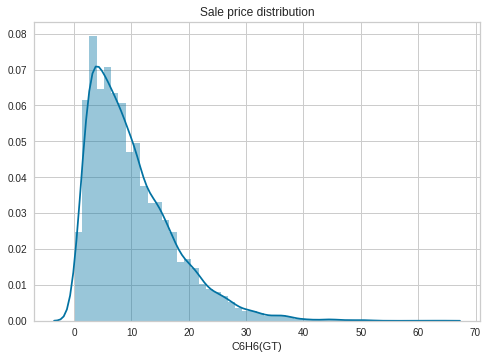

In [0]:
ax = sns.distplot(data['C6H6(GT)'], norm_hist=True)
ax.set_title('Sale price distribution');

((array([-3.79332599, -3.56720799, -3.44302275, ...,  3.44302275,
          3.56720799,  3.79332599]),
  array([ 0.1,  0.1,  0.2, ..., 50.8, 52.1, 63.7])),
 (6.9767745164368025, 10.095323861559296, 0.9477161845688613))

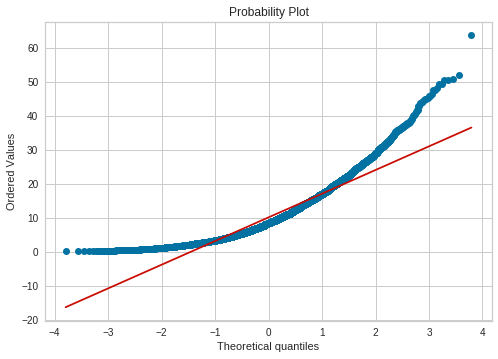

In [0]:
ss.probplot(data['C6H6(GT)'], plot=plt)

Text(0.5, 1.0, 'Log sale price distribution')

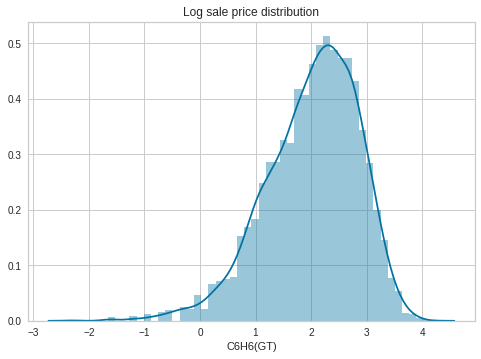

In [0]:
ax = sns.distplot(np.log(data['C6H6(GT)']), norm_hist=True)
ax.set_title('Log sale price distribution')

((array([-3.79332599, -3.56720799, -3.44302275, ...,  3.44302275,
          3.56720799,  3.79332599]),
  array([-2.30258509, -2.30258509, -1.60943791, ...,  3.92789635,
          3.95316495,  4.15418456])),
 (0.8188040932974098, 2.0220651365030085, 0.9868995322797579))

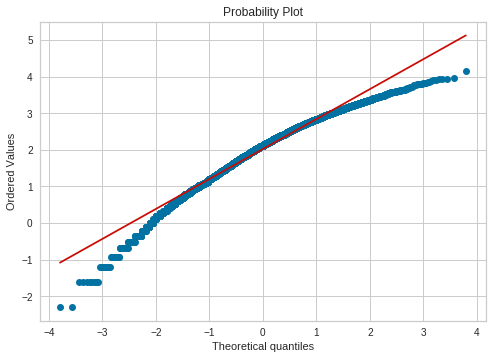

In [0]:
ss.probplot(np.log(data['C6H6(GT)']), plot=plt)

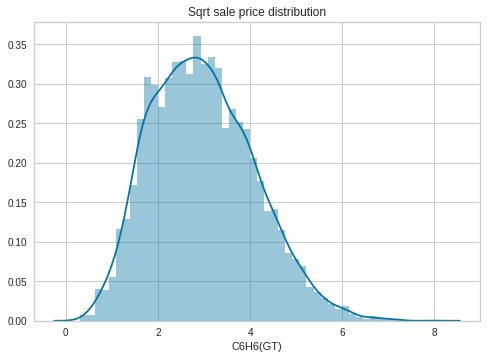

In [0]:
ax = sns.distplot(np.sqrt(data['C6H6(GT)']), norm_hist=True)
ax.set_title('Sqrt sale price distribution');

((array([-3.79332599, -3.56720799, -3.44302275, ...,  3.44302275,
          3.56720799,  3.79332599]),
  array([0.31622777, 0.31622777, 0.4472136 , ..., 7.12741187, 7.21803297,
         7.98122798])),
 (1.1134092619219065, 2.9732737575607047, 0.9935121353589664))

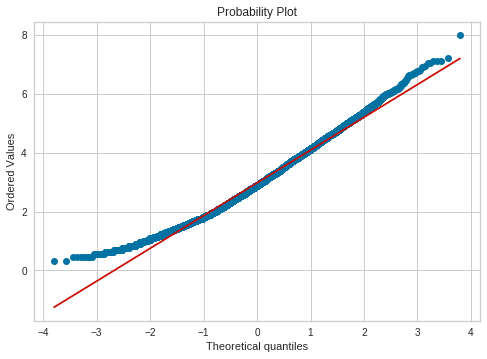

In [0]:
ss.probplot(np.sqrt(data['C6H6(GT)']), plot=plt)

По QQ-графику видно, что корень из таргетной переменной наиболее нормально распределен, поэтому используем его.

In [0]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Month,Day,Week,Dayofweek,Quarter,Hour
0,2004-03-10,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,3,10,11,2,1,18
1,2004-03-10,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,3,10,11,2,1,19
2,2004-03-10,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,3,10,11,2,1,20
3,2004-03-10,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,3,10,11,2,1,21
4,2004-03-10,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,3,10,11,2,1,22


In [0]:
data['C6H6(GT)'] = np.sqrt(data['C6H6(GT)'])
y = data['C6H6(GT)']

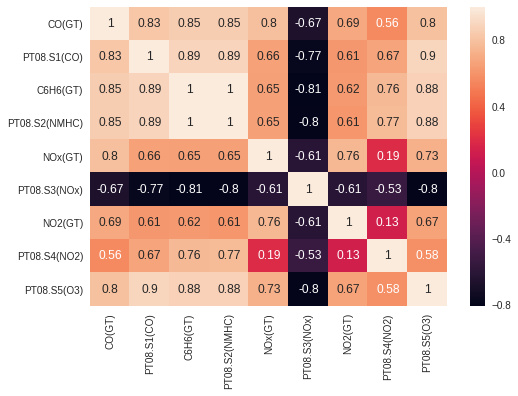

In [0]:
corr = data.corr()
condition = np.abs(corr['C6H6(GT)']) > 0.5
top_corr = corr.loc[condition, condition]
sns.heatmap(top_corr, annot=True);

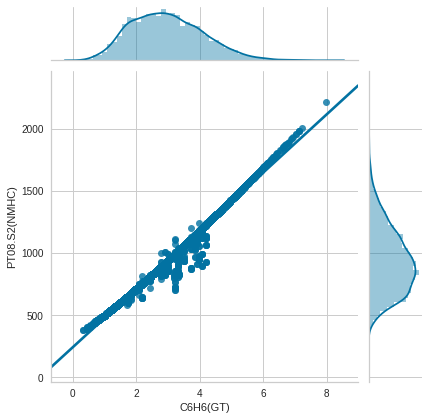

In [0]:
g = sns.jointplot("C6H6(GT)", "PT08.S2(NMHC)", data = data, kind="reg")

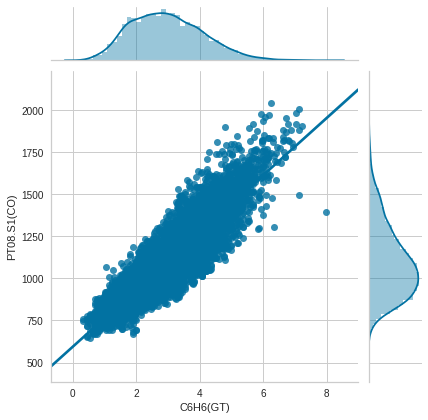

In [0]:
g = sns.jointplot("C6H6(GT)", "PT08.S1(CO)", data = data, kind="reg")

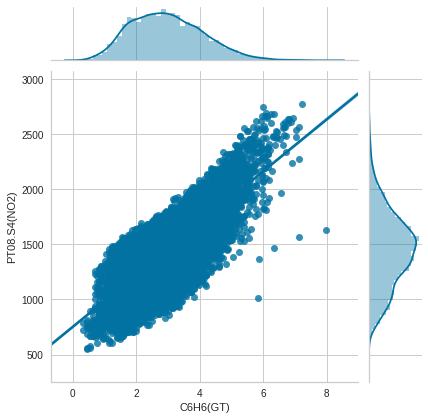

In [0]:
g = sns.jointplot("C6H6(GT)", "PT08.S4(NO2)", data = data, kind="reg")

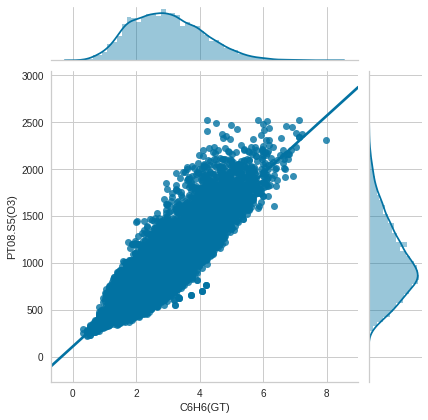

In [0]:
g = sns.jointplot("C6H6(GT)", "PT08.S5(O3)", data = data, kind="reg")

In [0]:
data.drop(columns = ['Date','Time','C6H6(GT)'],inplace = True)

In [0]:
df = data.copy()
scaler = StandardScaler() 
df = scaler.fit_transform(df)
X_train, X_test, y_train, y_test = train_test_split(df,y,test_size=0.3, random_state=42)

In [0]:
print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)

Training data size: (6528, 17)
Test data size: (2798, 17)


In [0]:
lr = LinearRegression()
lr_model = lr.fit(X_train,y_train)     

In [0]:
mse = cross_val_score(lr_model, X_train, y_train, scoring ='neg_mean_squared_error', cv=3).mean()
print('MSE of model with Feature Impotance:',mse)

MSE of model with Feature Impotance: -0.009458816861404047


In [0]:
print('Intercept:',lr_model.intercept_)
print('--------------------------------')
print('Slope:')
list(zip(data.columns.tolist(),lr_model.coef_))

Intercept: 2.973677284672025
--------------------------------
Slope:


[('CO(GT)', 0.010484632262986567),
 ('PT08.S1(CO)', -0.013295073075650088),
 ('PT08.S2(NMHC)', 1.0799709854073578),
 ('NOx(GT)', -0.012696087694099228),
 ('PT08.S3(NOx)', -0.03522878765010222),
 ('NO2(GT)', 0.03026764111766733),
 ('PT08.S4(NO2)', 0.0012109125590164323),
 ('PT08.S5(O3)', -0.0070113750376639555),
 ('T', 0.01961139195567371),
 ('RH', 0.011425914040685154),
 ('AH', -0.007028990309273609),
 ('Month', -0.0019492387748911509),
 ('Day', -0.005406623068000969),
 ('Week', 0.004671514374456027),
 ('Dayofweek', -0.0002391094678309412),
 ('Quarter', -0.0015678223341083763),
 ('Hour', 0.007019797817536494)]

In [0]:
list(zip(data.columns.tolist(),lr_model.coef_)).sort()

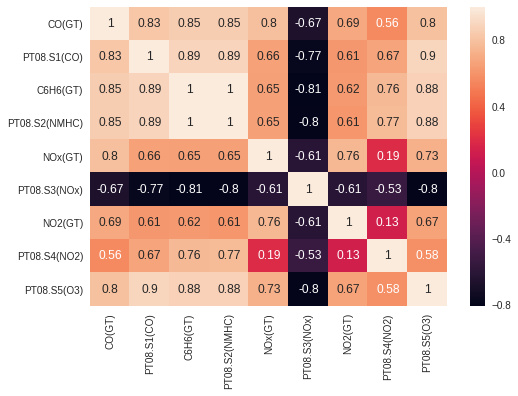

In [0]:
sns.heatmap(top_corr, annot=True)

Feature engineering

Добавим новые признаки, состоящие из различных статистик, по различным датам. Например, медиану CO(GT) за год, месяц, день и так далее.

In [0]:
funcs = ['mean','median','cumsum','cummin','cummax','count']
groups = ['Quarter','Month','Week','Dayofweek','Day','Hour','T','RH']
scipy_funcs = [ss.gmean,ss.hmean,ss.kurtosis]
def FE(columns):
    for i in columns:
        for j in groups:
            for k in funcs:
                data[k+'_'+i+'_'+'by'+'_'+j] = data[i].groupby(data[j]).transform(k)    
    for i in columns:
        for j in groups:
            for m in scipy_funcs:
                data[str(m).split()[1]+'_'+i+'_'+'by'+'_'+j] = data[i].groupby(data[j]).transform(lambda x: m(x)) 

In [0]:
FE(['CO(GT)','PT08.S1(CO)','PT08.S2(NMHC)','NOx(GT)','NO2(GT)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)'])

In [0]:
data.shape

(9326, 593)

Из 14 признаков у нас получилось 593.

In [0]:
df = data.copy()
scaler = StandardScaler() 
df = scaler.fit_transform(df)
X_train, X_test, y_train, y_test = train_test_split(df,y,test_size=0.3, random_state=42)

In [0]:
print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)

Training data size: (6528, 593)
Test data size: (2798, 593)


In [0]:
lr = LinearRegression()
lr_model = lr.fit(X_train,y_train)     

В качестве метрики будем использовать MSE. В принципе, можно было бы использовать MAE или другую метрику для регрессии, но MSE особенно чувствительна к выбросам, которых мы хотим избегать.

Для вычисления score будем использовать cross_val_score с 3 блоками из sklearn.model_selection.

In [0]:
mse = cross_val_score(lr_model, X_train, y_train,scoring ='neg_mean_squared_error', cv=3).mean()
print('Baseline MSE of model:',mse)

Baseline MSE of model: -0.004814160996129135


**Feature Impotance**

Начнем с Recursive Feature Elimination. RFE - это рекурсивный алгоритм, который на каждом цикле исключает наименее важные признаки для выбранной модели.

Сократим количество признаков с 593 до 500.

In [0]:
rfe_selector = RFE(estimator=lr_model, n_features_to_select=500, step=5, verbose=5)
rfe_selector.fit(X_train, y_train)
rfe_support = rfe_selector.get_support()
X_train = X_train[:,rfe_support]
X_test = X_test[:,rfe_support]

print(X_train.shape)

Fitting estimator with 593 features.
Fitting estimator with 588 features.
Fitting estimator with 583 features.
Fitting estimator with 578 features.
Fitting estimator with 573 features.
Fitting estimator with 568 features.
Fitting estimator with 563 features.
Fitting estimator with 558 features.
Fitting estimator with 553 features.
Fitting estimator with 548 features.
Fitting estimator with 543 features.
Fitting estimator with 538 features.
Fitting estimator with 533 features.
Fitting estimator with 528 features.
Fitting estimator with 523 features.
Fitting estimator with 518 features.
Fitting estimator with 513 features.
Fitting estimator with 508 features.
Fitting estimator with 503 features.
(6528, 500)


Проверим модель на новом признаковом пространтстве.

In [0]:
lr = LinearRegression()
lr_model = lr.fit(X_train,y_train)     

mse = cross_val_score(lr_model, X_train, y_train, scoring ='neg_mean_squared_error', cv=3).mean()
print('MSE of model with Feature Impotance:',mse)

MSE of model with Feature Impotance: -0.004723976222803974


Удалось немного уменьшить оишбку. Возможно, более простой алгоритм даст лучший результат. Попробуем отбирать признаки по корреляции.

In [0]:
df = data.copy()
X_train, X_test, y_train, y_test = train_test_split(df,y,test_size=0.3, random_state=42)

In [0]:
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.995)]
X_train = X_train.drop(to_drop, axis=1)
X_test = X_test.drop(to_drop, axis=1)
X_train.shape

(6528, 461)

In [0]:
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [0]:
lr = LinearRegression()
lr_model = lr.fit(X_train,y_train)     

mse = cross_val_score(lr_model, X_train, y_train, scoring ='neg_mean_squared_error', cv=3).mean()
print('MSE of model with Feature Impotance:',mse)

MSE of model with Feature Impotance: -0.004897436331369485


Ошибка увеличивается при любых параметрах значимости корреляции. Данный метод не помогает улучшить результат.

Напоследок попробуем SelectFromModel из sklearn.feature_selection. Суть та же, что и у RFE, однако тут удаление происходит не на каждой итерации, а, просто, удаляются наименее важные признаки на основе заданного порога.

In [0]:
df = data.copy()
X_train, X_test, y_train, y_test = train_test_split(df,y,test_size=0.3, random_state=42)

In [0]:
LinearRegression_selector = SelectFromModel(LinearRegression(), threshold='0.01*median')
LinearRegression_selector.fit(X_train, y_train)

LinearRegression_support = LinearRegression_selector.get_support()
LinearRegression_feature = X_train.loc[:,LinearRegression_support].columns.tolist()

X_train = X_train[LinearRegression_feature]
X_test = X_test[LinearRegression_feature]

In [0]:
lr = LinearRegression()
lr_model = lr.fit(X_train,y_train)     

mse = cross_val_score(lr_model, X_train, y_train, scoring ='neg_mean_squared_error', cv=3).mean()
print('MSE of model with Feature Impotance:',mse,'; Размер новой выборки =',X_train.shape)

MSE of model with Feature Impotance: -0.004810583910821335 ; Размер новой выборки = (6528, 560)


SelectFromModel не помог уменьшить ошибку при порогах 0.01median, 0.05median, 0.1median

Теперь попробуем использовать более продвинутые методы, например, LGB.

In [0]:
model = lgb.LGBMRegressor()

In [0]:
lgb_model = model.fit(X_train,y_train)    

In [0]:
mse = cross_val_score(lgb_model, X_train, y_train, scoring ='neg_mean_squared_error', cv=3).mean()     
print('MSE of LGB model:',mse)  

MSE of LGB model: -0.0021436716513183714


MSE снизилась более чем в 2 раза. LGB справляется с данной задачей заметно лучше линейной регресии.

Теперь попробуем настроить гиперпараметры с помощью Hyperopt, используя Tree of Parzen Estimators. Это алгоритм поиска в пространстве гиперпараметров с помощью оценки Парзена с древовидной структурой.

In [0]:
hp_space ={     'num_leaves' : 31,
                'max_depth': -1,
                'min_child_samples': 1 + hp.randint('min_child_samples', 40),
                'subsample_for_bin': 200000,
                'n_estimators': 1500,
                'min_split_gain' : hp.quniform('min_split_gain', 0, 0.1, 0.0001),
                'lambda_l1' : 0,
                'lambda_l2' : 0,
                'learning_rate' : hp.quniform('learning_rate', 0.001, 0.1, 0.001),
                'metric' :  'RMSE',
                'silent' : True,
                'importance_type' : 'split',
                'boosting_type' : 'gbdt',
                'subsample_freq' : 0 + hp.randint('subsample_freq',10),
                'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1, 0.001),
                'min_child_weight' : hp.quniform('min_child_weight', 0.001, 0.01, 0.001),
                'bagging_fraction ' : hp.quniform('bagging_fraction ', 0.0001, 1, 0.001)
            }
def hyperopt_lgb_score(params):
    lgbr = lgb.LGBMRegressor(**params)
    current_score = cross_val_score(lgbr, X_train, y_train,scoring='neg_mean_squared_error', cv=3).mean()
    print(-current_score, params)
    return -current_score

In [0]:
#best = fmin(fn=hyperopt_lgb_score, space=hp_space, algo=tpe.suggest, max_evals=10000,verbose=-1)

Т.к. алгоритм занимает длительное время, я сразу написал найденные алгоритмом гиперпараметры.

In [0]:
best = {
        'bagging_fraction ': 0.838,
        'colsample_bytree': 0.998,
        'n_estimators' : 150,
        'learning_rate': 0.07200000000000001,
        'min_child_samples': 3,
        'min_child_weight': 0.007,
        'min_split_gain': 0.0,
        'subsample_freq': 7
        }

In [0]:
model = lgb.LGBMRegressor(**best)
lgb_model = model.fit(X_train,y_train)    
mse = cross_val_score(model, X_train, y_train,scoring ='neg_mean_squared_error', cv=3).mean()
print('MSE of lGB model with hyperparameters tuning:', mse)

MSE of lGB model with hyperparameters tuning: -0.00213448245931152


С помощью Hyperopt нам удалось еще немного улучшить score.

Добавим RFE к LGB.

In [0]:
df = data.copy()
scaler = StandardScaler() 
df = scaler.fit_transform(df)
X_train, X_test, y_train, y_test = train_test_split(df,y,test_size=0.3, random_state=42)

rfe_selector = RFE(estimator=lgb_model, n_features_to_select=500, step=5, verbose=5)
rfe_selector.fit(X_train, y_train)
rfe_support = rfe_selector.get_support()
X_train = X_train[:,rfe_support]
X_test = X_test[:,rfe_support]

print(X_train.shape)

Fitting estimator with 593 features.
Fitting estimator with 588 features.
Fitting estimator with 583 features.
Fitting estimator with 578 features.
Fitting estimator with 573 features.
Fitting estimator with 568 features.
Fitting estimator with 563 features.
Fitting estimator with 558 features.
Fitting estimator with 553 features.
Fitting estimator with 548 features.
Fitting estimator with 543 features.
Fitting estimator with 538 features.
Fitting estimator with 533 features.
Fitting estimator with 528 features.
Fitting estimator with 523 features.
Fitting estimator with 518 features.
Fitting estimator with 513 features.
Fitting estimator with 508 features.
Fitting estimator with 503 features.
(6528, 500)


In [0]:
model = lgb.LGBMRegressor(**best)
lgb_model = model.fit(X_train,y_train)    
mse = cross_val_score(model, X_train, y_train,scoring ='neg_mean_squared_error', cv=3).mean()
print('MSE of lGB model with hyperparameters tuning:', mse)

MSE of lGB model with hyperparameters tuning: -0.0019090320556405822


Посмотрим на коэффициент детерминации, то есть на долю объясняемой дисперсии.

In [0]:
print("Коэффициент детерминации =", cross_val_score(lgb_model, X_train, y_train,scoring ='r2', cv=3).mean())

Коэффициент детерминации = 0.9984545541624651


Наша модель объясняет 99.8% диспресии прогнозируемой переменной - это очень хорошо.

Посмотрим на Residuals Plot. Данный график показывает разницу между остатками на вертикальной оси и зависимой переменной на горизонтальной оси. Тем самым можно увидить области, в которых ошибка ведет себе непредсказуемым образом.

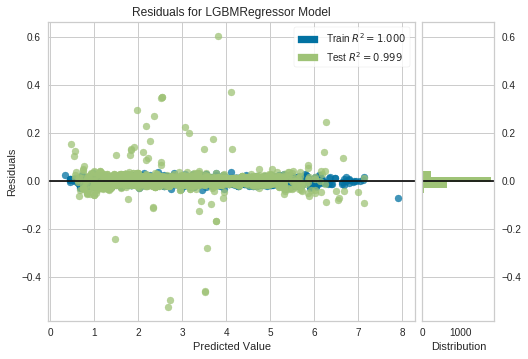

In [0]:
# Instantiate the linear model and visualizer # Insta 
visualizer = ResidualsPlot(lgb_model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.poof()             # Draw/show/poof the data

Мы видим, что большинство остатков лежит около горизонтальной оси 0, это означает что разница между наблюдаемым и действительным значением у модели LGB - отсутсвует или минимальна.

Отобразим фактические цели относительно прогнозируемых, сгенерированных моделью. Тем самым мы можем посмотреть на дисперсию модели и оценить шумы и гетероскедастичность модели. Линия под углом 45 градусов показывает прогноз в точности соответствующий модели.

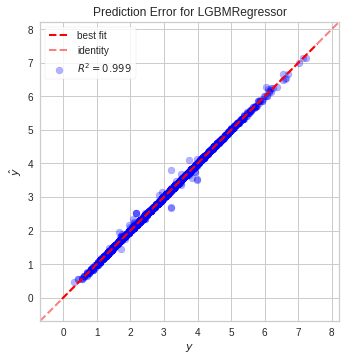

In [0]:
# Instantiate the linear model and visualizer
visualizer = PredictionError(lgb_model, point_color='blue', line_color='red', alpha=0.3)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.poof()             # Draw/show/poof the data

Мы видим, что прогнозы имеют небольшой остаток равномерно распределенный вдоль линии. Но в целом остаточный анализ говорит, что нет причин не доверять модели.

Сделаем остаточный анализ для линейной регресии с помощью statsmodels.api.

In [0]:
model = sm.OLS(X_train,y_train)

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train)

results = model.fit()

In [0]:
results.f_test(np.identity(501))

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 501, but rank is 379
  'rank is %d' % (J, J_), ValueWarning)


<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[39687.46663763]]), p=0.0, df_denom=6.15e+03, df_num=379>

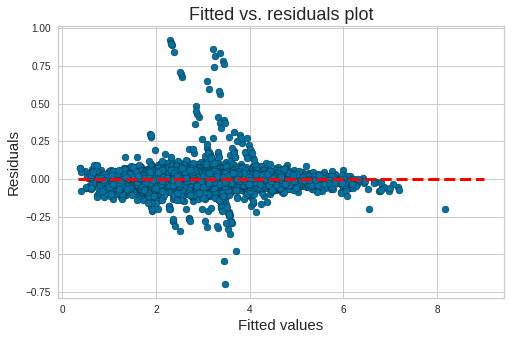

In [0]:
plt.figure(figsize=(8,5))
p=plt.scatter(x=results.fittedvalues,y=results.resid,edgecolor='k')
xmin=min(results.fittedvalues)
xmax = max(results.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()

Мы видим вертикальное скопление точек, что означает, что имеется нарушение гомоскедастичности модели, что может повлечь за собой недостоверные результаты.

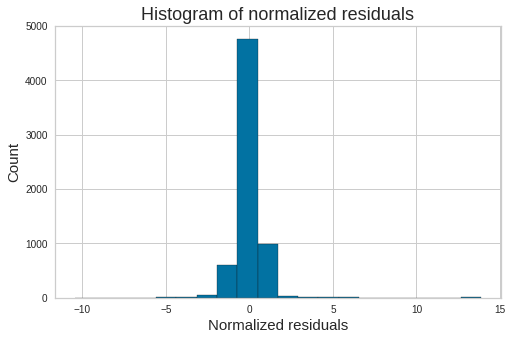

In [0]:
plt.figure(figsize=(8,5))
plt.hist(results.resid_pearson,bins=20,edgecolor='k')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Normalized residuals',fontsize=15)
plt.title('Histogram of normalized residuals',fontsize=18)
plt.show()

Остатки линейной модели не выглядят нормально распределенными. Построим QQ-график, чтобы убедиться в этом.

<Figure size 576x360 with 0 Axes>

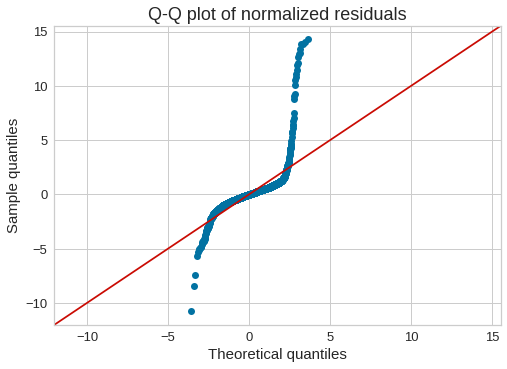

In [0]:
from statsmodels.graphics.gofplots import qqplot
plt.figure(figsize=(8,5))
fig=qqplot(results.resid_pearson,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot of normalized residuals",fontsize=18)
plt.grid(True)
plt.show()

Распределение остатков не является нормальным, что ставит под сомнение результаты линейной модели.